# Data Scraping using Pygooglenews tool

# DO NOT EXECUTE THESE STEPS...SCRAPING HAS ALREADY BEEN DONE

In [1]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from bs4 import BeautifulSoup

# import re

# # get headlines
# def get_headlines(topic,lang,country):
#     headlines_details = []
#     gn = GoogleNews(lang=lang,country=country)
#     headlines = gn.topic_headlines(topic)
#     newsitems = headlines['entries']
#     for item in newsitems:
#         story = {
#             'title' : item.title,
#             #'topic':topic,
#             'Published_on' : item.published,
#             'News_agency' : item.source['title'],
#             'URL' : item.link,
#             'summary':item.summary,
#             'Country': country,
#             'language': lang,
#             'tag': topic
#         }
#         headlines_details.append(story)
#     return headlines_details


# possible_countries = ["US", "GB", "CA", "AU", "DE", "FR", "ES", "IT", "JP", "CN", "RU", "BR", "IN"]
# languages = ['en']
# headlines_topics= ['WORLD','NATION','BUSINESS','TECHNOLOGY','ENTERTAINMENT','SCIENCE','SPORTS','HEALTH']


# x = []
# # the main df
# for loc in possible_countries:
#     for lang in languages:
#         for topic in headlines_topics:
#             print("printing topic",topic)
#             print('printing lang',lang)
#             print('printing country',loc)
#             x.append(get_headlines(topic,lang,loc))

            
# main_list=[]
# for list_of_dicts in x:
#     for d in list_of_dicts:
#         main_list.append(d)            
        
# df = pd.DataFrame(main_list)
# df.head()
# df.to_csv('Google_news_data',index= False)

# DEEP DIVE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import string
stopwords_eng = stopwords.words("english")

import nltk

plt.style.use('fivethirtyeight')
import warnings                    
warnings.filterwarnings('ignore')  

C:\Users\rohan aryan\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\rohan aryan\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [39]:
# global class for googlenews processing
class GoogleNews():
    """
    Description: This is a global class which contains functions for most of the activities performed in this script.
    """
    def __init__(self):
        pass
    
    def report(self, df):
        """
        Description:
        ---------------
        Function to display summary of the dataset.
        
        Arguments:
        ---------------
        df (pd.DataFrame) : Take a Dataframe object as input
        
        Returns:
        ---------------
        Returns a detailed report on meta data of the dataset, details like null values, duplicates, column types, statistatical summary etc 
        are displayed.
        """
        self.df = df
        print('******INFORMATION OF THE DATASET:******\n')
        print(f'Shape of the dataset: {df.shape},\n\nNumber of rows: {df.shape[0]},\nNumber of Columns: {df.shape[1]}')
        print('=' * 70)
        print('*** Information per column ***\n')
        print(df.info())
        print('=' * 70)
        
        print('*** COLUMNS IN THE DATAFRAME***\n')
        print(df.columns)
        print('=' * 70)
        
        # Null values
        print('*** COUNT OF NULL VALUES PER COLUMN ***\n')
        print(df.isnull().sum())
        print('=' * 70)
        print('Normalized:\n')
        print(df.isnull().mean()*100)
        print('=' * 70)
        
        # Duplicate entries
        print('*** COUNT OF DUPLICATE ENTRIES ***\n')
        print(f'The dataset has a total of {df.duplicated().sum()} duplicate entries')
        print('=' * 70)
        
        # Numerical and categorical columns
        print('*** COLUMN TYPES IN THE DATAFRAME ***\n')
        print('NUMERICAL COLUMNS: {}'.format([i for i in df.columns if df[i].dtype!='O']))
        print('\n')
        print('CATEGORICAL COLUMNS: {}'.format([i for i in df.columns if df[i].dtype=='O']))
        print('=' * 70)
        
        # Unique values per column
        print('*** COUNT OF UNIQUE VALUES PER COLUMN ***\n')
        [print(f'{x} :', df[x].nunique()) for x in df.columns if x!= 'URL' and x!= 'summary' and x!= 'Published_on' and x!= 'title']
        print('=' * 70)
        print('*** UNIQUE VALUES PER COLUMN ***\n')
        [print(f'{x} :\n', df[x].unique()) for x in df.columns if x!= 'URL' and x!= 'summary' and x!= 'Published_on' and x!= 'title']
        print('=' * 70)
        
        # Statistical summary
        print('*** STATISTICAL SUMMARY ***\n')
        print(df.describe().T)
        print('=' * 70)
        
    ####################################################################################################    
    ## VISUAL REPORT
    def visua_report(self, df):
        """
        Description:
        ---------------
        Function to display visual summary of the dataset.
        
        Arguments:
        ---------------
        df (pd.DataFrame) : Take a Dataframe object as input
        
        Returns:
        ---------------
        Returns a detailed report on meta data of the dataset, details like null values, duplicates, column types, statistatical summary etc 
        are displayed.
        
        NOTE: ONLY TO BE USED ON PREPROCESSED DATASET
        """
        self.df = df
       
        # year publihed..
        plt.figure(figsize=(14, 8))
        bars = sns.countplot(x = df['published_year'])
        plt.xlabel('Year')
        plt.ylabel('Frequency')
        plt.title('News Per Year', fontsize=20)
        for bar in bars.patches:
            plt.annotate(str(bar.get_height()), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                         xytext=(0, 1.25), 
                         textcoords="offset points",
                         ha='center', va='bottom')
        plt.show()
        
        # month publihed..
        plt.figure(figsize=(14, 8))
        bars = sns.countplot(x = df['published_month'])
        plt.xlabel('Month')
        plt.ylabel('Frequency')
        plt.title('News Per Month', fontsize=20)
        for bar in bars.patches:
            plt.annotate(str(bar.get_height()), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                         xytext=(0, 1.25), 
                         textcoords="offset points",
                         ha='center', va='bottom')
        plt.show()
        
        # distribution of country....
        plt.figure(figsize=(14, 8))
        bars = sns.countplot(x = df['Country'])
        plt.xlabel('Country')
        plt.ylabel('Frequency')
        plt.title('Count of countries',  fontsize=20)
        for bar in bars.patches:
            plt.annotate(str(bar.get_height()), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                         xytext=(0, 1.25), 
                         textcoords="offset points",
                         ha='center', va='bottom')
        plt.show()
        
         # distribution of tag..
        plt.figure(figsize=(14, 8))
        bars = sns.countplot(x = df['tag'])
        plt.xlabel('Topics')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.title('Topics Distribution', fontsize=20)

        for bar in bars.patches:
            plt.annotate(str(bar.get_height()), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                         xytext=(0, 1.25), 
                         textcoords="offset points",
                         ha='center', va='bottom')
    
        plt.show()
        
        # Top 10 news agencies (count)..
        x = df.News_agency.value_counts().sort_values(ascending=False)[:10]
        plt.figure(figsize=(14, 8))
        sns.barplot(x = x.index, y= x.values)

        for bar in plt.gca().patches:
            plt.annotate(str(bar.get_height()), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                     xytext=(0, 1.25), 
                     textcoords="offset points",
                     ha='center', va='bottom')

        plt.xlabel('News Agencies')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.title('Top 10 News agencies (count)', fontsize=20)
        plt.show()
        
        # distribution of word count..
        plt.figure(figsize=(20, 5))
        bars = sns.countplot(x = df['word_count'])
        plt.title('Count of words per description', fontdict={'fontsize': 20})
        plt.xlabel('Count')
        plt.ylabel('freq')
        plt.xticks(rotation =90, fontsize =10)

        # annotating only the highest bar..
        plt.annotate(str(bars.patches[0].get_height()), xy=(bars.patches[0].get_x() + bars.patches[0].get_width() / 2, bars.patches[0].get_height()),
                     xytext=(0, 1.25), 
                     textcoords="offset points",
                     ha='center', va='bottom')

        plt.show()
      
    ####################################################################################################
    # Helper functions should be defined at the class level
    def lower(self, text):
        return text.lower()
    
    def remove_whitespaces(self, text):
        return text.strip()
    
    def remove_punctuations(self, text):
        return text.translate(str.maketrans('', '', string.punctuation))
    
    def tokenize(self, text): 
        return word_tokenize(text)
    
    def remove_stopwords(self, tokens):
        return [word for word in tokens if word not in set(stopwords.words('english')) and len(word) > 3]
    
    def lemmatize(self, tokens):
        lemmatizer = WordNetLemmatizer()
        return [lemmatizer.lemmatize(token) for token in tokens]
    
    def stem_words(self, lemmas):
        stemmer = PorterStemmer()
        return [stemmer.stem(lemma) for lemma in lemmas]
    
    # The preprocess function should also be defined at the class level
    def preprocess(self, text):
        """
        Description:
        ---------------
        Function to preprocess text.
        
        Arguments:
        ---------------
        text (str) : text to preprocess
        
        Returns:
        ---------------
        tokens (list) : returns a list of tokens that are preprocessed using various helper functions.
        """
        lowered_text = self.lower(text)
        strip_text = self.remove_whitespaces(lowered_text)
        no_punc_text = self.remove_punctuations(strip_text)
        tokens = self.tokenize(no_punc_text)
        no_stop_words = self.remove_stopwords(tokens)
        lemma_words = self.lemmatize(no_stop_words)
        cleaned_text = self.stem_words(lemma_words)
        return cleaned_text
    ####################################################################################################
    # functions to create word clouds...
    
    def create_wordclouds(self, df):
        """
        Description:
        ---------------
        Function to create wordclouds.
        
        Arguments:
        ---------------
        df (pd.DataFrame) : Take a Dataframe object as input
        
        Returns:
        ---------------
        Displays wordclouds.
        
        NOTE: ONLY USED ON MERGED_TS AND PREPROCESSED_TEXT
        """
        # word cloud 1..(merged_TS)
        text = ' '.join(df['merged_TS'])

        plt.figure(figsize = (20,20))
        plt.suptitle('MERGED TITLE AND SUMMARY', y=0.95, fontsize = 24)

        wordcloud = WordCloud(max_words = 200 , width = 1000 , height = 1000 , background_color="white",include_numbers=False).generate(text)

        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        
        #word cloud 2..
        text = ' '.join(df['preprocessed_text'])

        plt.figure(figsize = (20,20))
        plt.suptitle('PREPROCESSED TEXT', y=0.95, fontsize = 24)

        wordcloud = WordCloud(max_words = 200 , width = 1000 , height = 1000 , background_color="white",include_numbers=False).generate(text)

        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

In [4]:
df = pd.read_csv('C:\\Users\\rohan aryan\\Desktop\\lambton\\Temp_REPOS\\GoogleNewsData-Social_Media_Analytics\\Dataset\\Google_news_data.csv')

In [5]:
df.head()

title  \
0  Canada and India expel diplomats over killing ...   
1  U.S. raises concern with Israel as Gaza hospit...   
2  Artificial Intelligence Raises Ukrainian Drone...   
3  Lebanon’s emergency workers pay a deadly price...   
4  Tourist dies trying to climb Spanish bridge fo...   

                    Published_on          News_agency  \
0  Tue, 15 Oct 2024 13:14:51 GMT      Financial Times   
1  Tue, 15 Oct 2024 13:51:42 GMT             CBS News   
2  Mon, 14 Oct 2024 11:38:05 GMT            Kyiv Post   
3  Tue, 15 Oct 2024 12:14:56 GMT              BBC.com   
4  Tue, 15 Oct 2024 11:45:04 GMT  The Washington Post   

                                                 URL  \
0  https://news.google.com/rss/articles/CBMicEFVX...   
1  https://news.google.com/rss/articles/CBMiowFBV...   
2  https://news.google.com/rss/articles/CBMiS0FVX...   
3  https://news.google.com/rss/articles/CBMiWkFVX...   
4  https://news.google.com/rss/articles/CBMiiwFBV...   

                                             summary Country language    tag  
0  <ol><li><a href="https://news.google.com/rss/a...      US       en  WORLD  
1  <ol><li><a href="https://news.google.com/rss/a...      US       en  WORLD  
2  <ol><li><a href="https://news.google.com/rss/a...      US       en  WORLD  
3  <ol><li><a href="https://news.google.com/rss/a...      US       en  WORLD  
4  <ol><li><a href="https://news.google.com/rss/a...      US       en  WORLD

In [6]:
google = GoogleNews()
google.report(df)

******INFORMATION OF THE DATASET:******

Shape of the dataset: (6128, 8),

Number of rows: 6128,
Number of Columns: 8
*** Information per column ***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6128 entries, 0 to 6127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         6128 non-null   object
 1   Published_on  6128 non-null   object
 2   News_agency   6128 non-null   object
 3   URL           6128 non-null   object
 4   summary       6128 non-null   object
 5   Country       6128 non-null   object
 6   language      6128 non-null   object
 7   tag           6128 non-null   object
dtypes: object(8)
memory usage: 383.1+ KB
None
*** COLUMNS IN THE DATAFRAME***

Index(['title', 'Published_on', 'News_agency', 'URL', 'summary', 'Country',
       'language', 'tag'],
      dtype='object')
*** COUNT OF NULL VALUES PER COLUMN ***

title           0
Published_on    0
News_agency     0
URL             0
summar

# Cleaning:

In [7]:
# Preprocessing of columns, Validations
# converting it to right format
df['published_date'] = pd.to_datetime(df['Published_on'])
# extracting yr, dt, mn
df['published_year'] = df['published_date'].dt.year
df['published_month'] = df['published_date'].dt.month
df['published_day'] = df['published_date'].dt.day

In [8]:
# preprocessing summary
def parse_html(content):
    soup = BeautifulSoup(content, 'html.parser')
    summ = []
    for item in soup.find_all('li'):
        text = item.find('a').text
        summ.append(text)
    return ' '.join(summ)

# checking the function
content = df.summary.iloc[0]
text = parse_html(content)
print(text)

Canada and India expel diplomats over killing of Sikh activist Trudeau’s Move Casts Light on the Reach of India’s Intelligence Agencies Canada-India diplomatic row over Sikh activist's assassination grows as top diplomats are expelled Canadian police accuse India of working with criminal network to kill dissidents


In [9]:
# committing changes
df['summary'] = df['summary'].apply(parse_html)
# checking a random value
df['summary'].values[121]

'Stock futures are little changed after Dow closes above 43,000 for the first time: Live updates Stock market today: Nasdaq jumps, S&P 500 trades at record high with earnings on deck U.S. stocks add to all-time high with more gains on Monday Dow Jones Futures: S&P 500 Hits New High As Nvidia Closes At Record Level Forbes Daily: S&P 500 Hits New High On Strong Bank Earnings'

In [10]:
def clean_news_agency(text):
    for agencies in df['News_agency']:
        pattern = r'([.]com|[.]au|[.]org|[.]gov)'
        news_agency = re.sub(pattern, '', text)
    return news_agency

# testing the function
text = 'CNN.com'
cleaned_text = clean_news_agency(text)
print(cleaned_text) # works

CNN


In [11]:
df['News_agency'] = df['News_agency'].apply(clean_news_agency)
df.query('News_agency == "CNN"')[:5]

title  \
9   US suggests military aid to Israel is at risk ...   
19  Deadly drone attack by Hezbollah exposes Israe...   
43  The Sahara Desert flooded for the first time i...   
46  One’s got a big appetite, the other’s a bit of...   
57  In Colin Allred, Ted Cruz once again facing a ...   

                     Published_on News_agency  \
9   Tue, 15 Oct 2024 15:32:00 GMT         CNN   
19  Mon, 14 Oct 2024 19:38:00 GMT         CNN   
43  Mon, 14 Oct 2024 19:14:00 GMT         CNN   
46  Tue, 15 Oct 2024 14:57:00 GMT         CNN   
57  Tue, 15 Oct 2024 08:00:00 GMT         CNN   

                                                  URL  \
9   https://news.google.com/rss/articles/CBMimwFBV...   
19  https://news.google.com/rss/articles/CBMipgFBV...   
43  https://news.google.com/rss/articles/CBMihAFBV...   
46  https://news.google.com/rss/articles/CBMilAFBV...   
57  https://news.google.com/rss/articles/CBMigwFBV...   

                                              summary Country language  \
9   US suggests military aid to Israel is at risk ...      US       en   
19  Deadly drone attack by Hezbollah exposes Israe...      US       en   
43  The Sahara Desert flooded for the first time i...      US       en   
46  One’s got a big appetite, the other’s a bit of...      US       en   
57  In Colin Allred, Ted Cruz once again facing a ...      US       en   

       tag      published_date  published_year  published_month  published_day  
9    WORLD 2024-10-15 15:32:00            2024               10             15  
19   WORLD 2024-10-14 19:38:00            2024               10             14  
43   WORLD 2024-10-14 19:14:00            2024               10             14  
46  NATION 2024-10-15 14:57:00            2024               10             15  
57  NATION 2024-10-15 08:00:00            2024               10             15

In [12]:
# overview of df so far..
df.head()

title  \
0  Canada and India expel diplomats over killing ...   
1  U.S. raises concern with Israel as Gaza hospit...   
2  Artificial Intelligence Raises Ukrainian Drone...   
3  Lebanon’s emergency workers pay a deadly price...   
4  Tourist dies trying to climb Spanish bridge fo...   

                    Published_on          News_agency  \
0  Tue, 15 Oct 2024 13:14:51 GMT      Financial Times   
1  Tue, 15 Oct 2024 13:51:42 GMT             CBS News   
2  Mon, 14 Oct 2024 11:38:05 GMT            Kyiv Post   
3  Tue, 15 Oct 2024 12:14:56 GMT                  BBC   
4  Tue, 15 Oct 2024 11:45:04 GMT  The Washington Post   

                                                 URL  \
0  https://news.google.com/rss/articles/CBMicEFVX...   
1  https://news.google.com/rss/articles/CBMiowFBV...   
2  https://news.google.com/rss/articles/CBMiS0FVX...   
3  https://news.google.com/rss/articles/CBMiWkFVX...   
4  https://news.google.com/rss/articles/CBMiiwFBV...   

                                             summary Country language    tag  \
0  Canada and India expel diplomats over killing ...      US       en  WORLD   
1  U.S. raises concern with Israel as Gaza hospit...      US       en  WORLD   
2  Artificial Intelligence Raises Ukrainian Drone...      US       en  WORLD   
3  Lebanon’s emergency workers pay a deadly price...      US       en  WORLD   
4  Tourist dies trying to climb Spanish bridge fo...      US       en  WORLD   

       published_date  published_year  published_month  published_day  
0 2024-10-15 13:14:51            2024               10             15  
1 2024-10-15 13:51:42            2024               10             15  
2 2024-10-14 11:38:05            2024               10             14  
3 2024-10-15 12:14:56            2024               10             15  
4 2024-10-15 11:45:04            2024               10             15

In [13]:
# feature engineering..
# lets create word count, sentence count, stopwords_count columns to understand the count of words per summary for each article
def counts(text):
    word_count = len(word_tokenize(text))
    sentence_count = len(sent_tokenize(text))
    stop_count = sum(1 for i in word_tokenize(text) if i.lower() in set(stopwords.words('english')))
    return word_count, sentence_count, stop_count

# testing the function
text = df.summary.values[0]
word_count, sentence_count, stop_count = counts(text)
print(f'word count: {word_count}\nsentence count: {sentence_count}\nstopwords: {stop_count}')

word count: 51
sentence count: 1
stopwords: 14


In [14]:
# this function will consider special characters as well as they are a part of the summary (raw form)
df['word_count'], df['sent_count'], df['stopwords_count'] = zip(*df['summary'].apply(counts))

In [15]:
df.head()

title  \
0  Canada and India expel diplomats over killing ...   
1  U.S. raises concern with Israel as Gaza hospit...   
2  Artificial Intelligence Raises Ukrainian Drone...   
3  Lebanon’s emergency workers pay a deadly price...   
4  Tourist dies trying to climb Spanish bridge fo...   

                    Published_on          News_agency  \
0  Tue, 15 Oct 2024 13:14:51 GMT      Financial Times   
1  Tue, 15 Oct 2024 13:51:42 GMT             CBS News   
2  Mon, 14 Oct 2024 11:38:05 GMT            Kyiv Post   
3  Tue, 15 Oct 2024 12:14:56 GMT                  BBC   
4  Tue, 15 Oct 2024 11:45:04 GMT  The Washington Post   

                                                 URL  \
0  https://news.google.com/rss/articles/CBMicEFVX...   
1  https://news.google.com/rss/articles/CBMiowFBV...   
2  https://news.google.com/rss/articles/CBMiS0FVX...   
3  https://news.google.com/rss/articles/CBMiWkFVX...   
4  https://news.google.com/rss/articles/CBMiiwFBV...   

                                             summary Country language    tag  \
0  Canada and India expel diplomats over killing ...      US       en  WORLD   
1  U.S. raises concern with Israel as Gaza hospit...      US       en  WORLD   
2  Artificial Intelligence Raises Ukrainian Drone...      US       en  WORLD   
3  Lebanon’s emergency workers pay a deadly price...      US       en  WORLD   
4  Tourist dies trying to climb Spanish bridge fo...      US       en  WORLD   

       published_date  published_year  published_month  published_day  \
0 2024-10-15 13:14:51            2024               10             15   
1 2024-10-15 13:51:42            2024               10             15   
2 2024-10-14 11:38:05            2024               10             14   
3 2024-10-15 12:14:56            2024               10             15   
4 2024-10-15 11:45:04            2024               10             15   

   word_count  sent_count  stopwords_count  
0          51           1               14  
1          55           1                9  
2          42           1                8  
3          71           1               18  
4          74           1               19

In [16]:
# we dont require published_on
df.drop(columns='Published_on', inplace=True)

In [17]:
df.head()

title          News_agency  \
0  Canada and India expel diplomats over killing ...      Financial Times   
1  U.S. raises concern with Israel as Gaza hospit...             CBS News   
2  Artificial Intelligence Raises Ukrainian Drone...            Kyiv Post   
3  Lebanon’s emergency workers pay a deadly price...                  BBC   
4  Tourist dies trying to climb Spanish bridge fo...  The Washington Post   

                                                 URL  \
0  https://news.google.com/rss/articles/CBMicEFVX...   
1  https://news.google.com/rss/articles/CBMiowFBV...   
2  https://news.google.com/rss/articles/CBMiS0FVX...   
3  https://news.google.com/rss/articles/CBMiWkFVX...   
4  https://news.google.com/rss/articles/CBMiiwFBV...   

                                             summary Country language    tag  \
0  Canada and India expel diplomats over killing ...      US       en  WORLD   
1  U.S. raises concern with Israel as Gaza hospit...      US       en  WORLD   
2  Artificial Intelligence Raises Ukrainian Drone...      US       en  WORLD   
3  Lebanon’s emergency workers pay a deadly price...      US       en  WORLD   
4  Tourist dies trying to climb Spanish bridge fo...      US       en  WORLD   

       published_date  published_year  published_month  published_day  \
0 2024-10-15 13:14:51            2024               10             15   
1 2024-10-15 13:51:42            2024               10             15   
2 2024-10-14 11:38:05            2024               10             14   
3 2024-10-15 12:14:56            2024               10             15   
4 2024-10-15 11:45:04            2024               10             15   

   word_count  sent_count  stopwords_count  
0          51           1               14  
1          55           1                9  
2          42           1                8  
3          71           1               18  
4          74           1               19

## Preprocessing pipeline

In [18]:
# testing the preprocessing pipeline
text = df.summary.iloc[0]
cleaned_text = google.preprocess(text)
print(cleaned_text)

['canada', 'india', 'expel', 'diplomat', 'kill', 'sikh', 'activist', 'trudeau', 'move', 'cast', 'light', 'reach', 'india', 'intellig', 'agenc', 'canadaindia', 'diplomat', 'sikh', 'activist', 'assassin', 'grow', 'diplomat', 'expel', 'canadian', 'polic', 'accus', 'india', 'work', 'crimin', 'network', 'kill', 'dissid']


In [19]:
# lets make a column with title + summary to reserve as much information as possible..
df['merged_TS'] = df['title'] + ' ' + df['summary']

In [20]:
# checking..
df.merged_TS.iloc[0]

"Canada and India expel diplomats over killing of Sikh activist - Financial Times Canada and India expel diplomats over killing of Sikh activist Trudeau’s Move Casts Light on the Reach of India’s Intelligence Agencies Canada-India diplomatic row over Sikh activist's assassination grows as top diplomats are expelled Canadian police accuse India of working with criminal network to kill dissidents"

In [21]:
# lets run the preprocessing pipeline on the merged feature
df['preprocessed_text'] = df['merged_TS'].apply(google.preprocess)

In [22]:
df['preprocessed_text'].head()

0    [canada, india, expel, diplomat, kill, sikh, a...
1    [rais, concern, israel, gaza, hospit, strike, ...
2    [artifici, intellig, rais, ukrainian, drone, k...
3    [lebanon, emerg, worker, deadli, price, amid, ...
4    [tourist, dy, tri, climb, spanish, bridg, soci...
Name: preprocessed_text, dtype: object

In [23]:
df.head(2)

title      News_agency  \
0  Canada and India expel diplomats over killing ...  Financial Times   
1  U.S. raises concern with Israel as Gaza hospit...         CBS News   

                                                 URL  \
0  https://news.google.com/rss/articles/CBMicEFVX...   
1  https://news.google.com/rss/articles/CBMiowFBV...   

                                             summary Country language    tag  \
0  Canada and India expel diplomats over killing ...      US       en  WORLD   
1  U.S. raises concern with Israel as Gaza hospit...      US       en  WORLD   

       published_date  published_year  published_month  published_day  \
0 2024-10-15 13:14:51            2024               10             15   
1 2024-10-15 13:51:42            2024               10             15   

   word_count  sent_count  stopwords_count  \
0          51           1               14   
1          55           1                9   

                                           merged_TS  \
0  Canada and India expel diplomats over killing ...   
1  U.S. raises concern with Israel as Gaza hospit...   

                                   preprocessed_text  
0  [canada, india, expel, diplomat, kill, sikh, a...  
1  [rais, concern, israel, gaza, hospit, strike, ...

In [24]:
# save changes
# df.to_csv('Google(preprocesses).csv', index=False)

# EXECUTE FROM HERE:

## VISUAL ANALYSIS 

In [25]:
# importing the dataset with all the preprocessed data..
df = pd.read_csv('C:\\Users\\rohan aryan\\Desktop\\lambton\\Temp_REPOS\\GoogleNewsData-Social_Media_Analytics\\Dataset\\Google(preprocesses).csv')

In [26]:
df.head()

title          News_agency  \
0  Canada and India expel diplomats over killing ...      Financial Times   
1  U.S. raises concern with Israel as Gaza hospit...             CBS News   
2  Artificial Intelligence Raises Ukrainian Drone...            Kyiv Post   
3  Lebanon’s emergency workers pay a deadly price...                  BBC   
4  Tourist dies trying to climb Spanish bridge fo...  The Washington Post   

                                                 URL  \
0  https://news.google.com/rss/articles/CBMicEFVX...   
1  https://news.google.com/rss/articles/CBMiowFBV...   
2  https://news.google.com/rss/articles/CBMiS0FVX...   
3  https://news.google.com/rss/articles/CBMiWkFVX...   
4  https://news.google.com/rss/articles/CBMiiwFBV...   

                                             summary Country language    tag  \
0  Canada and India expel diplomats over killing ...      US       en  WORLD   
1  U.S. raises concern with Israel as Gaza hospit...      US       en  WORLD   
2  Artificial Intelligence Raises Ukrainian Drone...      US       en  WORLD   
3  Lebanon’s emergency workers pay a deadly price...      US       en  WORLD   
4  Tourist dies trying to climb Spanish bridge fo...      US       en  WORLD   

              published_date  published_year  published_month  published_day  \
0  2024-10-15 13:14:51+00:00            2024               10             15   
1  2024-10-15 13:51:42+00:00            2024               10             15   
2  2024-10-14 11:38:05+00:00            2024               10             14   
3  2024-10-15 12:14:56+00:00            2024               10             15   
4  2024-10-15 11:45:04+00:00            2024               10             15   

   word_count  sent_count  stopwords_count  \
0          51           1               14   
1          55           1                9   
2          42           1                8   
3          71           1               18   
4          74           1               19   

                                           merged_TS  \
0  Canada and India expel diplomats over killing ...   
1  U.S. raises concern with Israel as Gaza hospit...   
2  Artificial Intelligence Raises Ukrainian Drone...   
3  Lebanon’s emergency workers pay a deadly price...   
4  Tourist dies trying to climb Spanish bridge fo...   

                                   preprocessed_text  
0  ['canada', 'india', 'expel', 'diplomat', 'kill...  
1  ['rais', 'concern', 'israel', 'gaza', 'hospit'...  
2  ['artifici', 'intellig', 'rais', 'ukrainian', ...  
3  ['lebanon', 'emerg', 'worker', 'deadli', 'pric...  
4  ['tourist', 'dy', 'tri', 'climb', 'spanish', '...

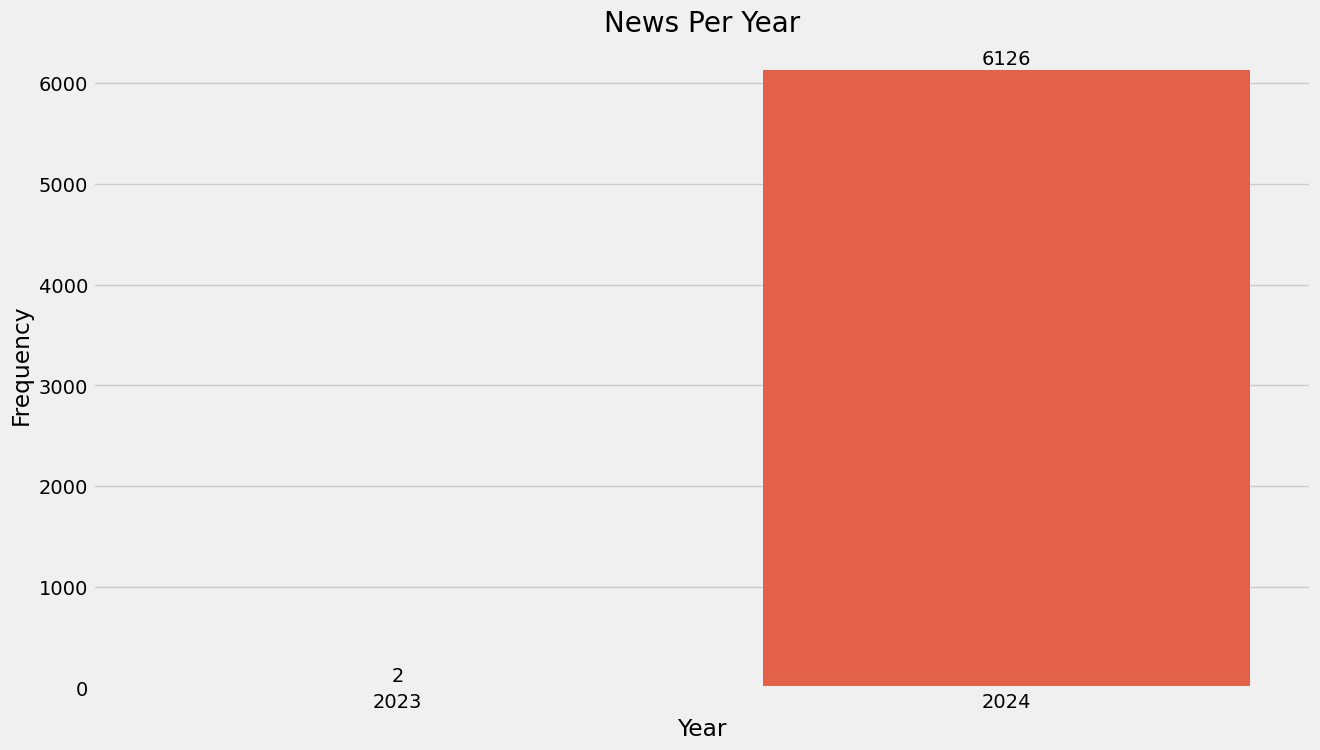

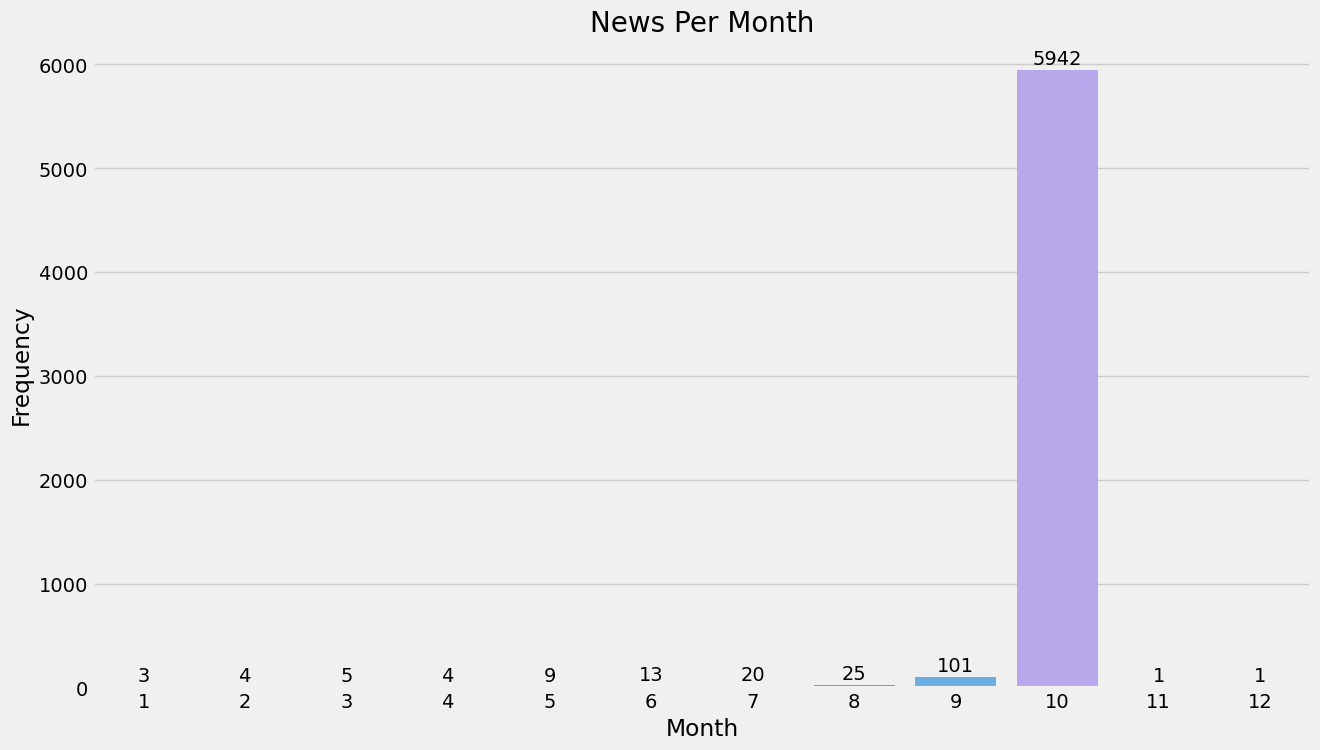

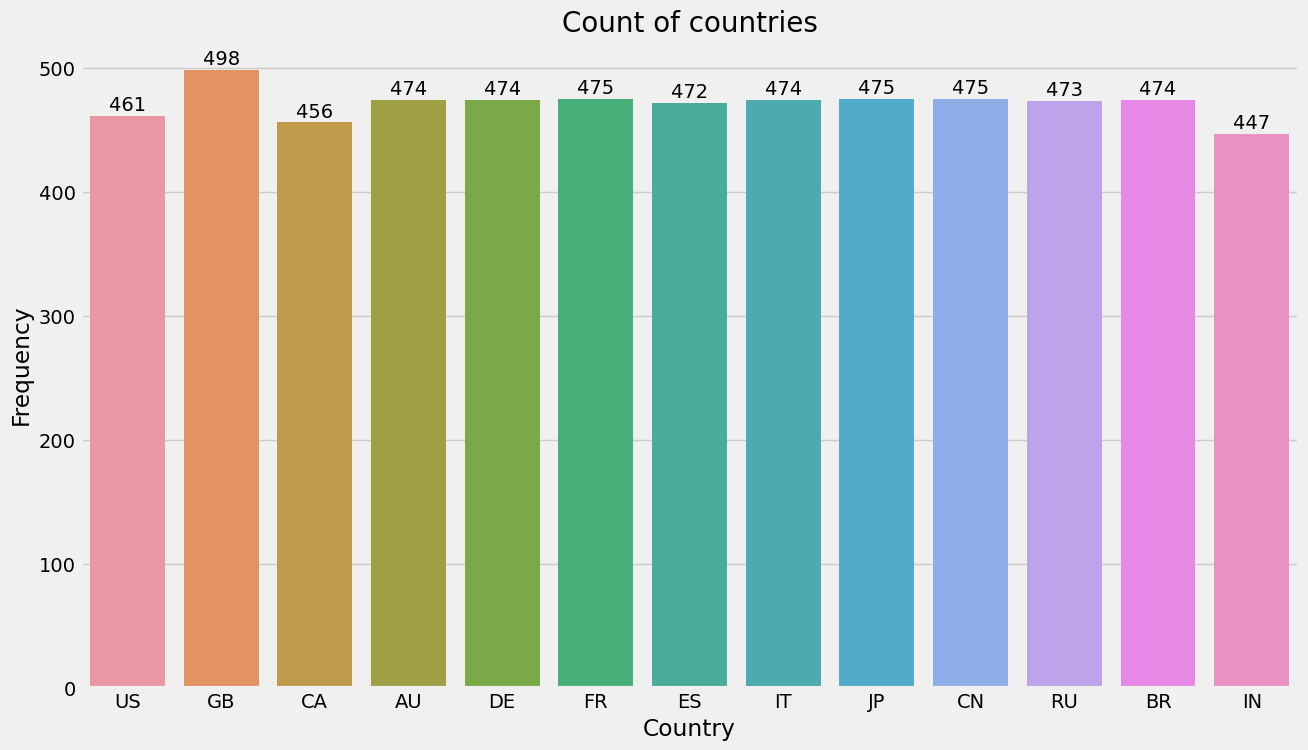

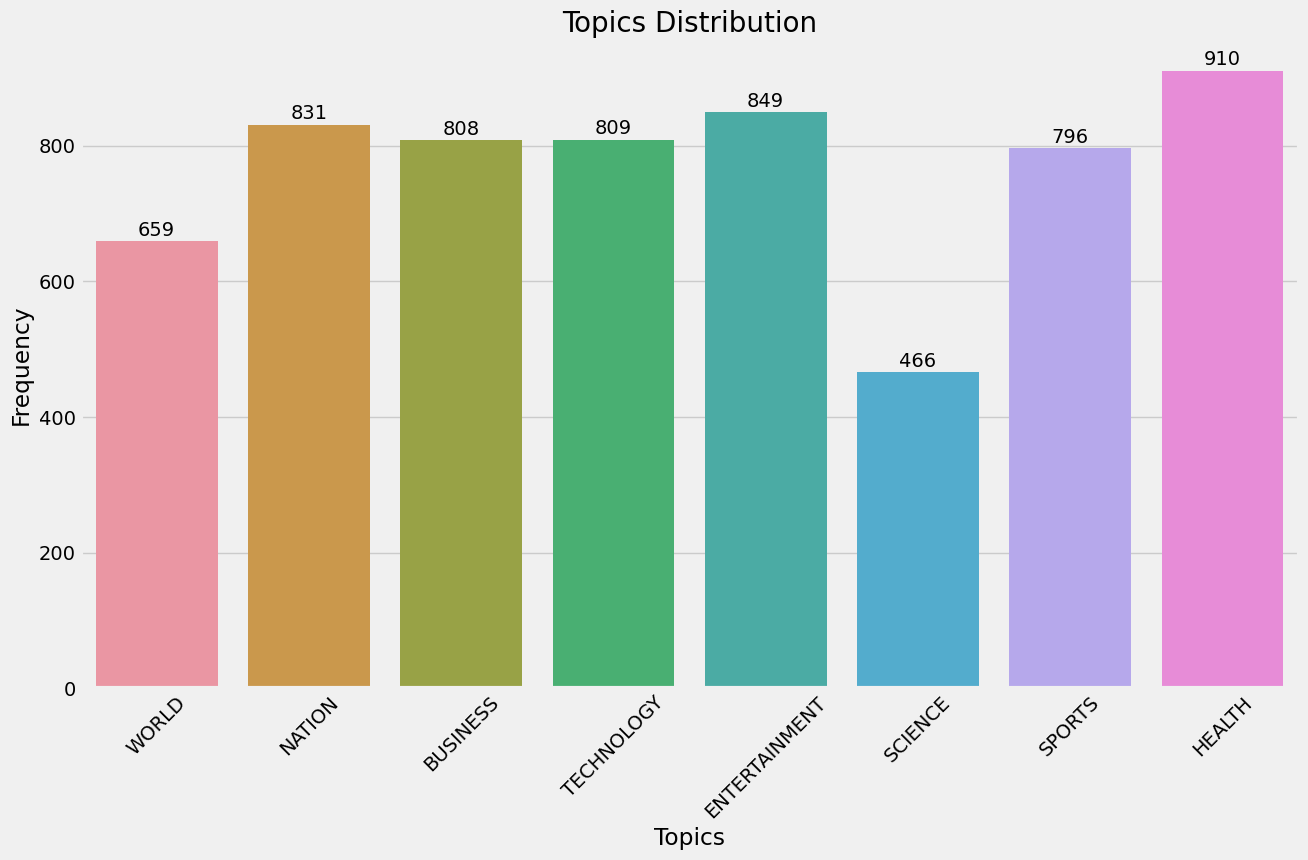

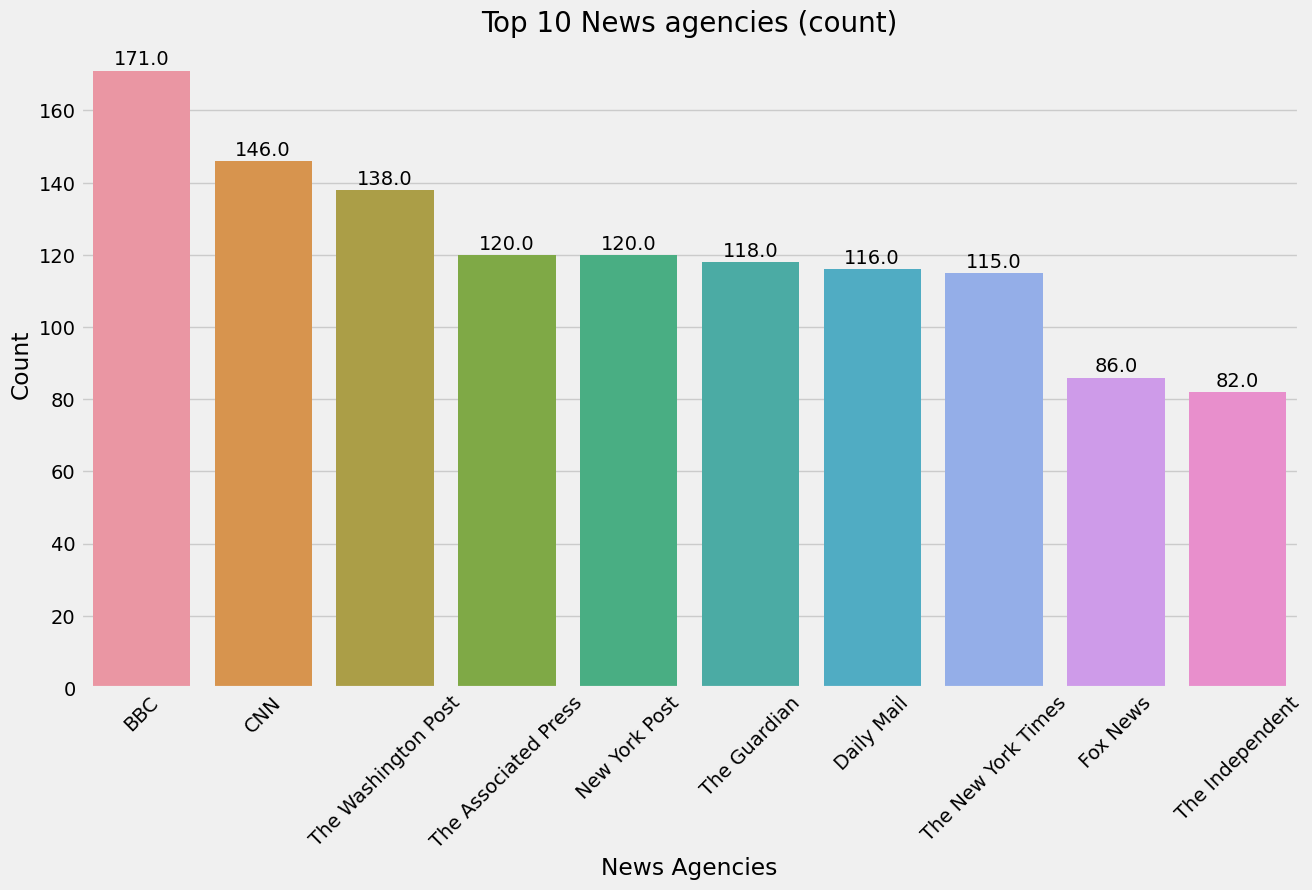

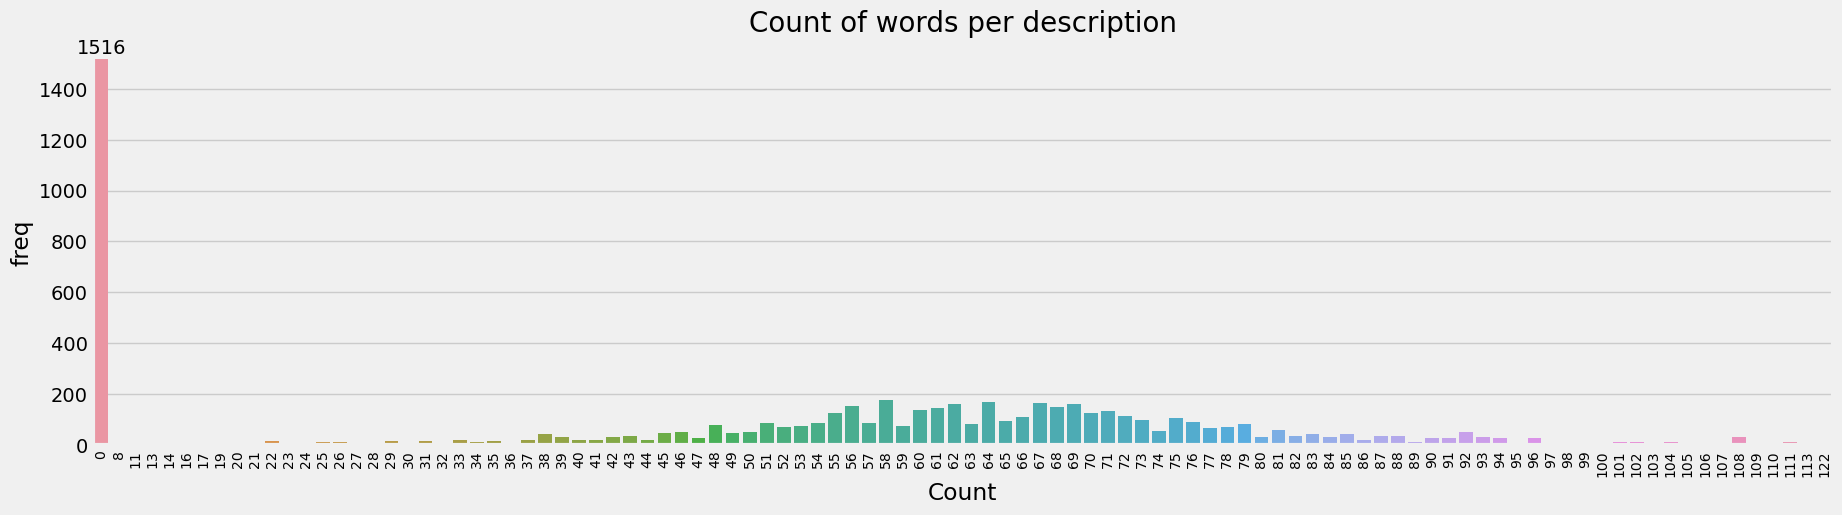

In [27]:
google.visua_report(df)

In [28]:
df.query('word_count == 0')

title      News_agency  \
37    Father called UK police to confess to killing ...         Fox News   
42    Israel will ‘hit Hezbollah mercilessly in all ...  All Israel News   
68    Supreme Court tosses lower court decision that...         CBS News   
78    Supreme Court leaves in place Pennsylvania law...              CNN   
111   UnitedHealth forecasts 2025 profit below Stree...    Yahoo Finance   
...                                                 ...              ...   
6118         Foods to Eat During Your Period - PTC News         PTC News   
6119  Diet guide: Here's how much nutrition you need...     Moneycontrol   
6120  Fed up of zits and pimples? 9 acne-friendly fo...        Firstpost   
6121  No updated seasonal diseases data from Telanga...        The Hindu   
6122  The Protein Rules Athletes Should Follow (or I...          Outside   

                                                    URL summary Country  \
37    https://news.google.com/rss/articles/CBMisgFBV...     NaN      US   
42    https://news.google.com/rss/articles/CBMivwFBV...     NaN      US   
68    https://news.google.com/rss/articles/CBMikAFBV...     NaN      US   
78    https://news.google.com/rss/articles/CBMilgFBV...     NaN      US   
111   https://news.google.com/rss/articles/CBMilgFBV...     NaN      US   
...                                                 ...     ...     ...   
6118  https://news.google.com/rss/articles/CBMiqgFBV...     NaN      IN   
6119  https://news.google.com/rss/articles/CBMi0gFBV...     NaN      IN   
6120  https://news.google.com/rss/articles/CBMi1AFBV...     NaN      IN   
6121  https://news.google.com/rss/articles/CBMi3wFBV...     NaN      IN   
6122  https://news.google.com/rss/articles/CBMid0FVX...     NaN      IN   

     language       tag             published_date  published_year  \
37         en     WORLD  2024-10-15 05:18:00+00:00            2024   
42         en     WORLD  2024-10-14 18:33:45+00:00            2024   
68         en    NATION  2024-10-15 14:28:19+00:00            2024   
78         en    NATION  2024-10-15 13:46:00+00:00            2024   
111        en  BUSINESS  2024-10-15 14:30:46+00:00            2024   
...       ...       ...                        ...             ...   
6118       en    HEALTH  2024-10-14 09:48:28+00:00            2024   
6119       en    HEALTH  2024-10-14 06:20:28+00:00            2024   
6120       en    HEALTH  2024-10-14 09:21:18+00:00            2024   
6121       en    HEALTH  2024-10-14 06:11:00+00:00            2024   
6122       en    HEALTH  2024-10-15 06:00:00+00:00            2024   

      published_month  published_day  word_count  sent_count  stopwords_count  \
37                 10             15           0           0                0   
42                 10             14           0           0                0   
68                 10             15           0           0                0   
78                 10             15           0           0                0   
111                10             15           0           0                0   
...               ...            ...         ...         ...              ...   
6118               10             14           0           0                0   
6119               10             14           0           0                0   
6120               10             14           0           0                0   
6121               10             14           0           0                0   
6122               10             15           0           0                0   

                                              merged_TS  \
37    Father called UK police to confess to killing ...   
42    Israel will ‘hit Hezbollah mercilessly in all ...   
68    Supreme Court tosses lower court decision that...   
78    Supreme Court leaves in place Pennsylvania law...   
111   UnitedHealth forecasts 2025 profit below Stree...   
...                                                 ...   
6118     

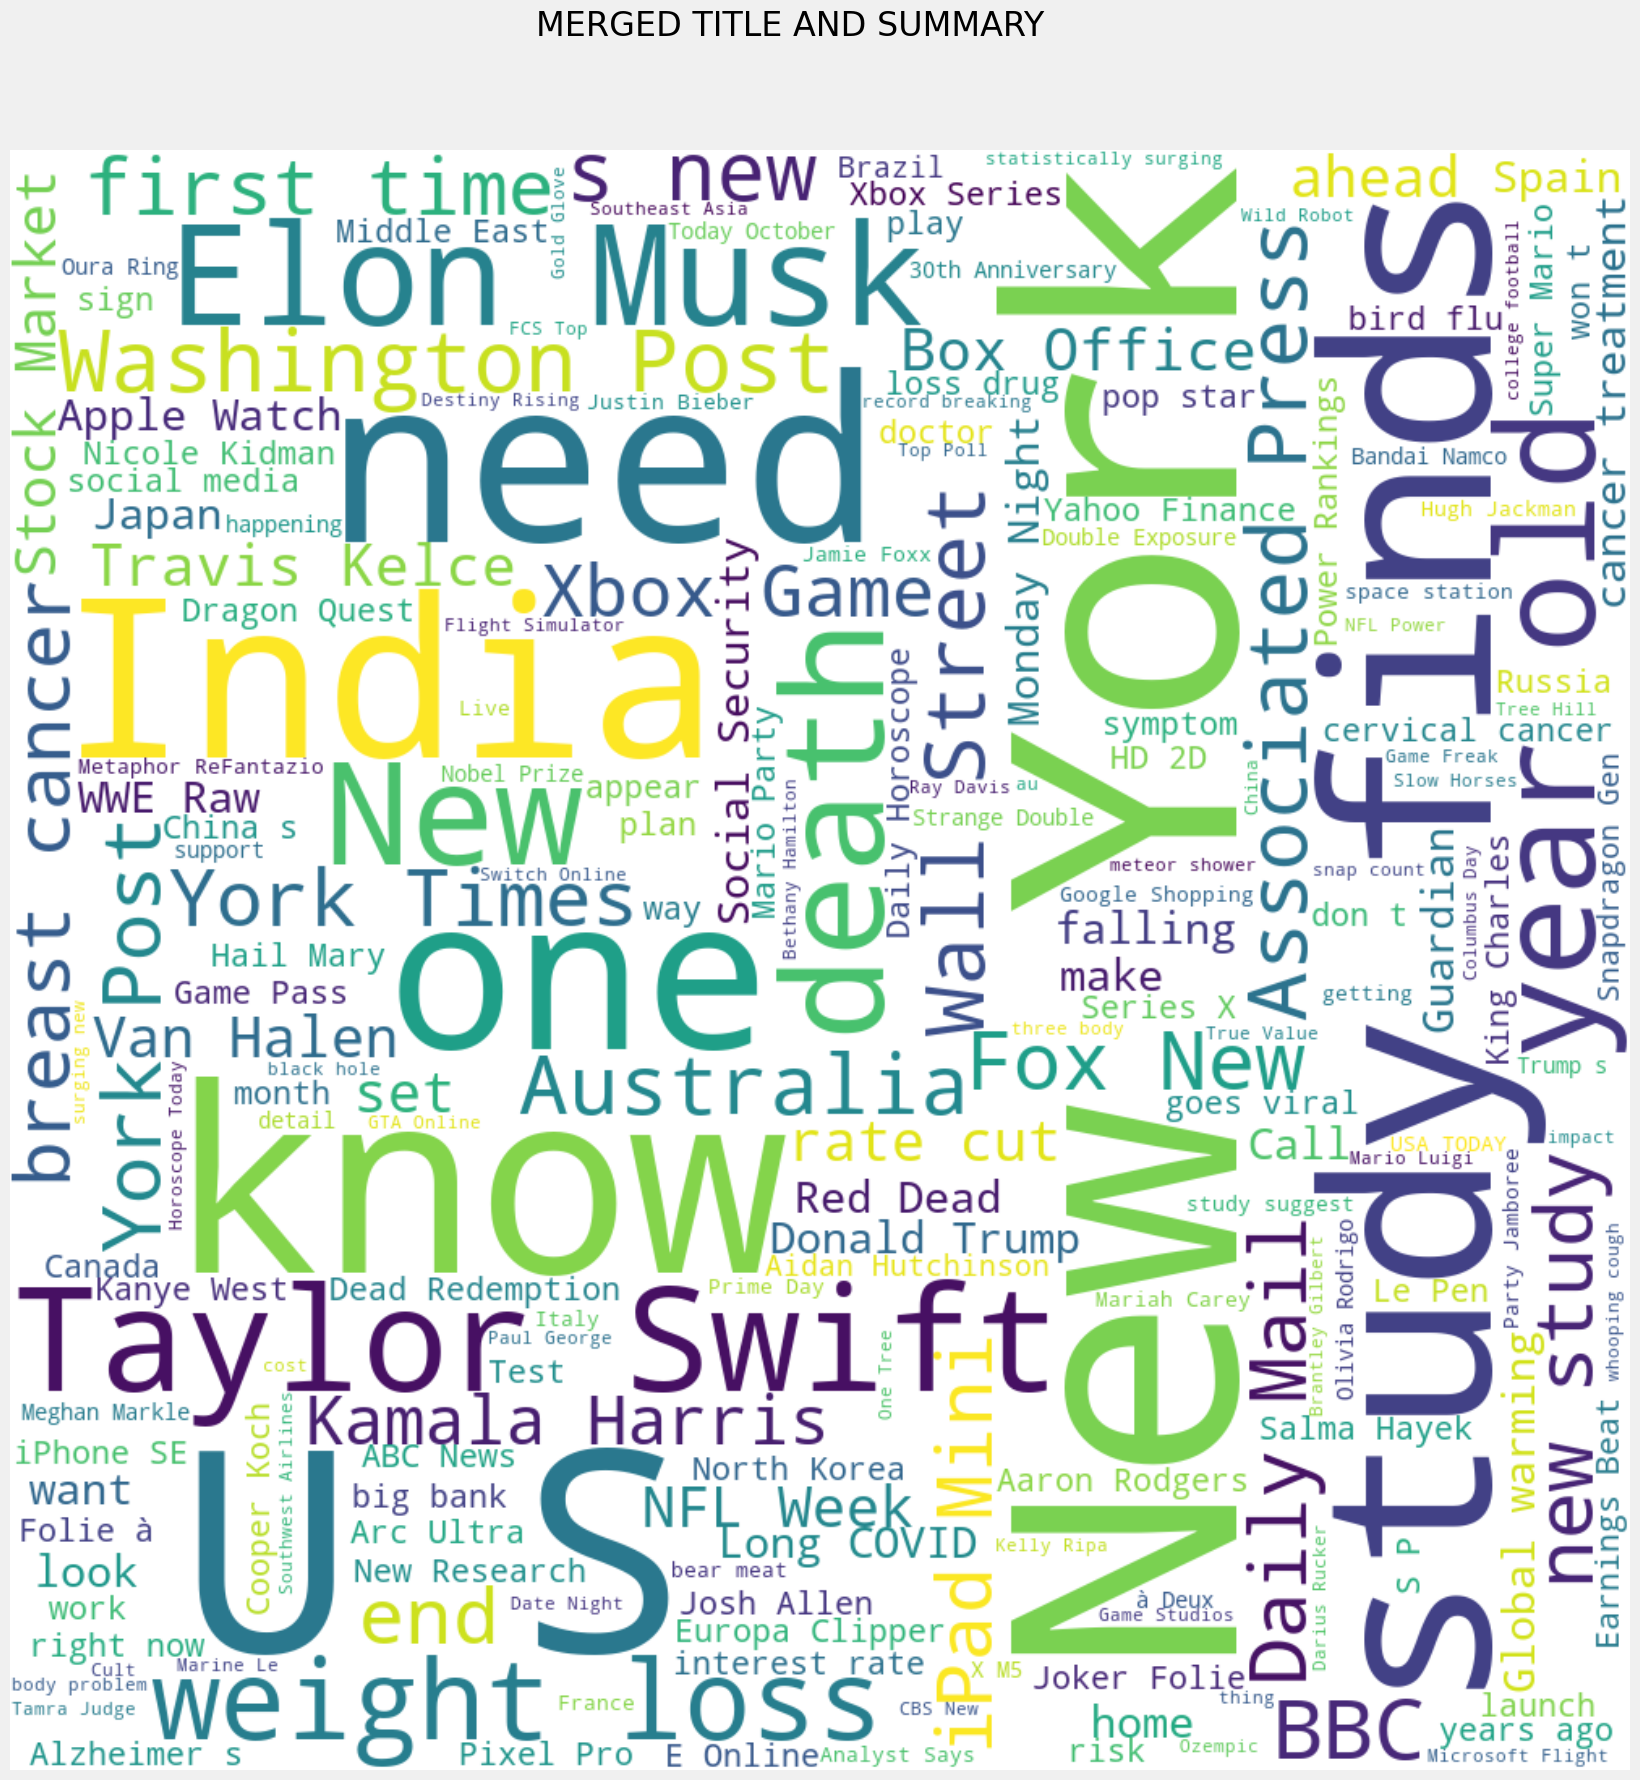

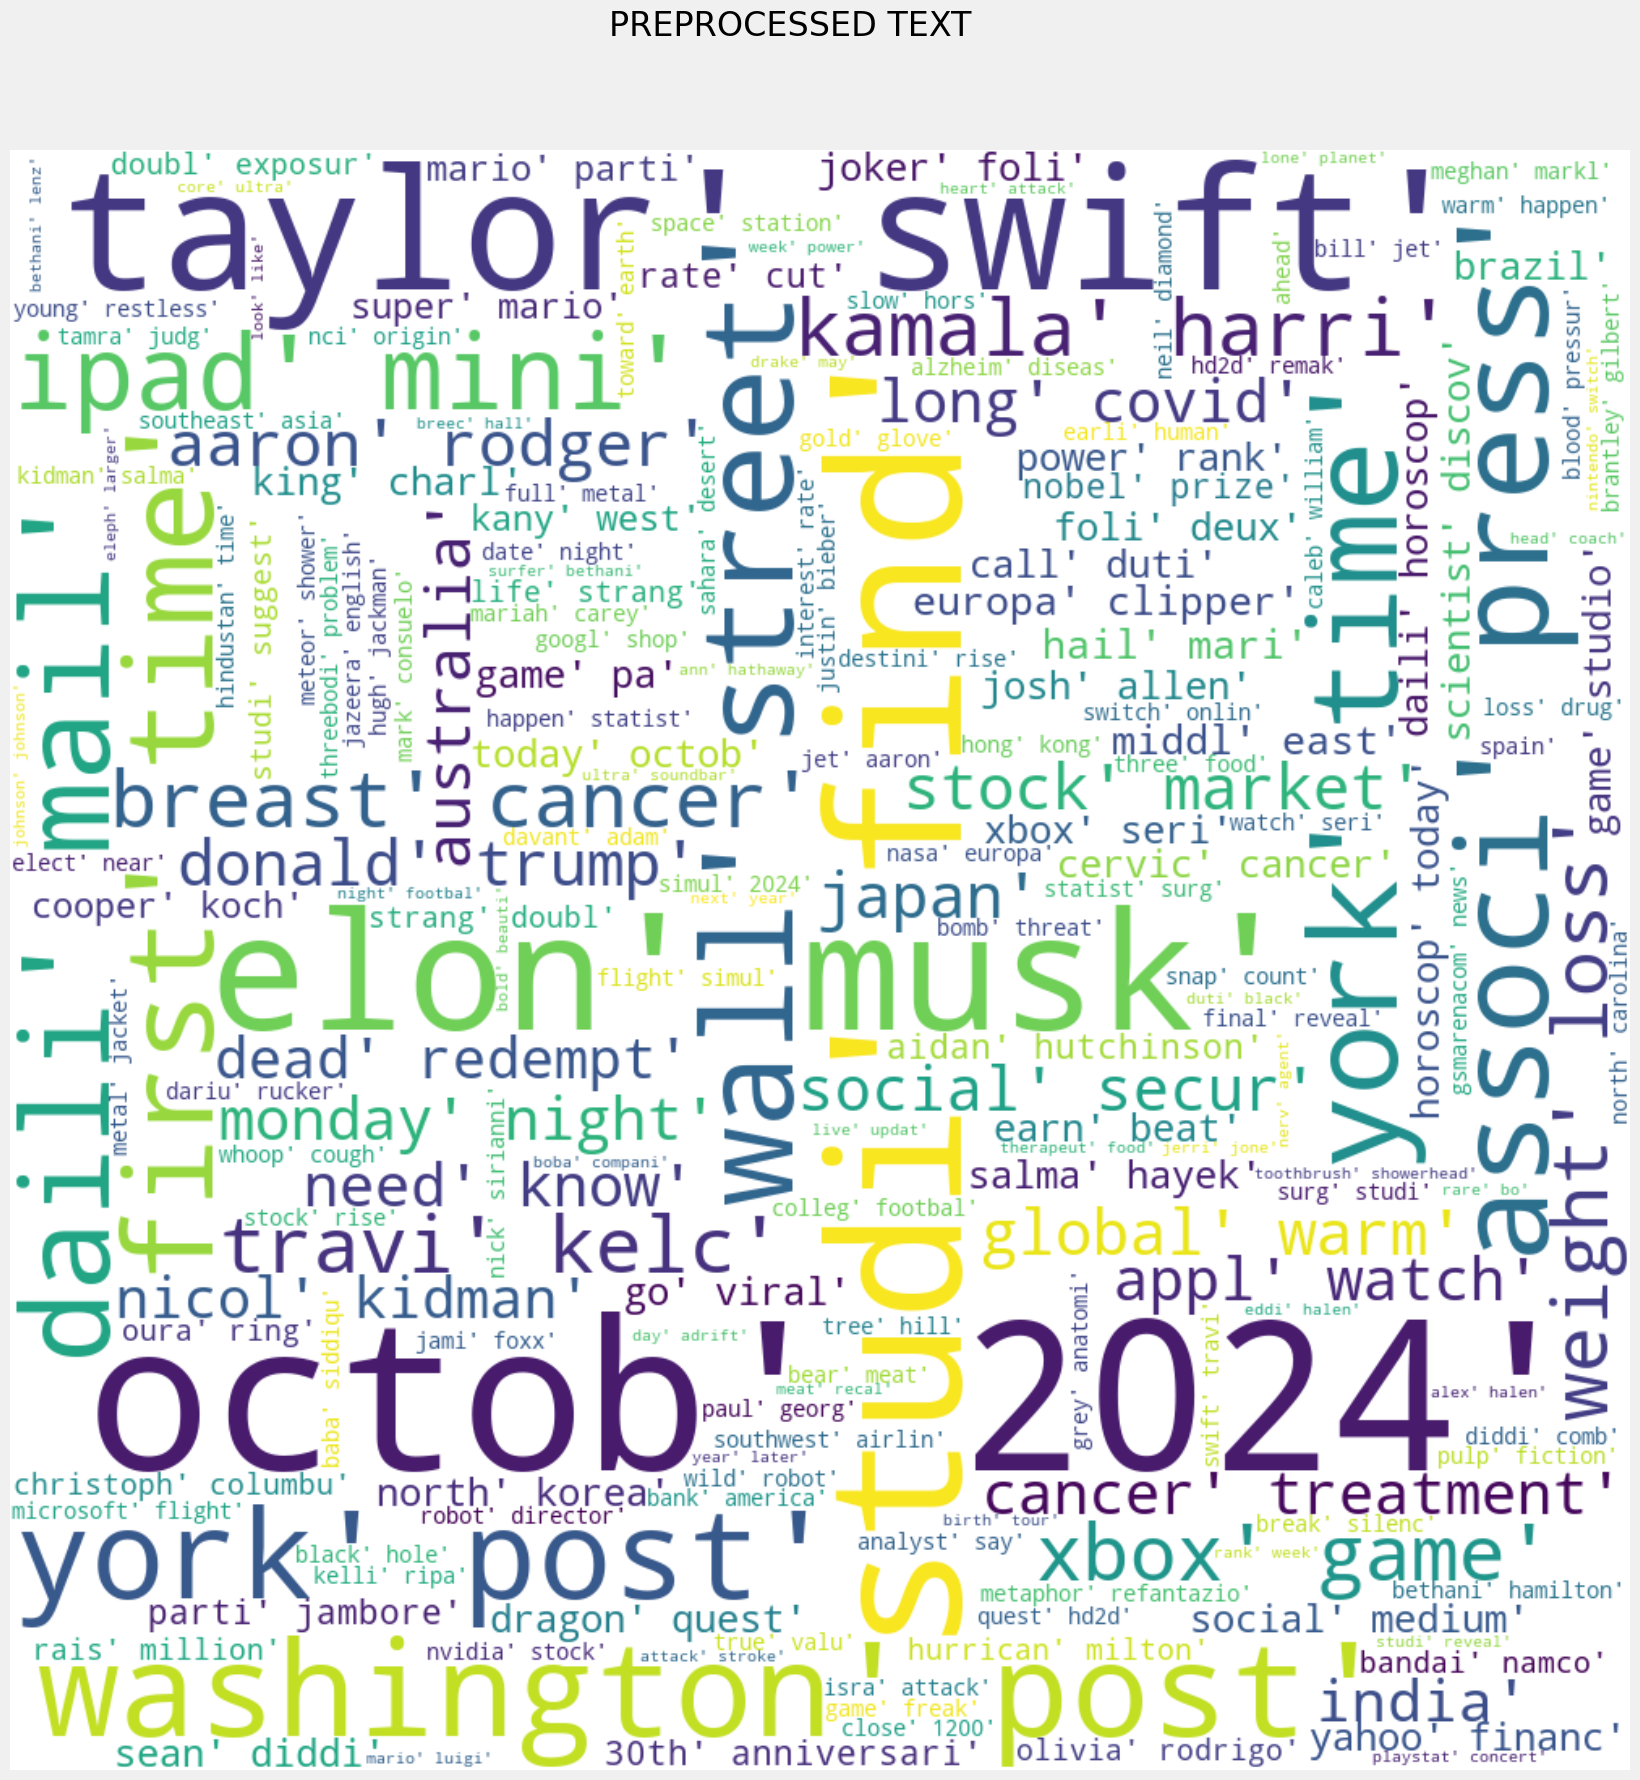

In [29]:
google.create_wordclouds(df)

# TOPIC MODELING 

In [30]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [31]:
example_preprocessed = df.preprocessed_text.values[0]
example_preprocessed

"['canada', 'india', 'expel', 'diplomat', 'kill', 'sikh', 'activist', 'financi', 'time', 'canada', 'india', 'expel', 'diplomat', 'kill', 'sikh', 'activist', 'trudeau', 'move', 'cast', 'light', 'reach', 'india', 'intellig', 'agenc', 'canadaindia', 'diplomat', 'sikh', 'activist', 'assassin', 'grow', 'diplomat', 'expel', 'canadian', 'polic', 'accus', 'india', 'work', 'crimin', 'network', 'kill', 'dissid']"

In [33]:
# Tokenize the preprocessed text
df['tokenized_text'] = df['preprocessed_text'].apply(lambda x: x.split())

# Creating a dictionary out of the tokenized text
dictionary = corpora.Dictionary(df['tokenized_text'])

# applying filters...
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=1000)

# Bag of Words corpus..
corpus = [dictionary.doc2bow(text) for text in df['tokenized_text']]

# Apply LDA model
model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=100,
                     update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)


In [34]:
# looking at the top 10 topics from the model..
for idx, topic in model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.083*"'stock'," + 0.073*"'share'," + 0.044*"'fall'," + 0.033*"'earn'," + 0.032*"'today'," + 0.029*"'know'," + 0.027*"'improv'," + 0.026*"'symptom'," + 0.021*"'england'," + 0.020*"'warn',"
Topic: 1 
Words: 0.059*"'studi'," + 0.056*"'reveal'," + 0.053*"'test'," + 0.030*"'nasa'," + 0.029*"'space'," + 0.025*"'reduc'," + 0.020*"'still'," + 0.019*"'asteroid'," + 0.018*"'offer'," + 0.017*"'earth',"
Topic: 2 
Words: 0.057*"'health'," + 0.042*"'case'," + 0.040*"'star'," + 0.037*"'israel'," + 0.027*"'say'," + 0.027*"'report'," + 0.024*"'play'," + 0.020*"'outbreak'," + 0.019*"'target'," + 0.019*"'amid',"
Topic: 3 
Words: 0.033*"'food'," + 0.030*"'risk'," + 0.029*"'take'," + 0.026*"'diabet'," + 0.025*"'chang'," + 0.024*"'time'," + 0.021*"'diet'," + 0.020*"'young'," + 0.020*"'heart'," + 0.017*"'rais',"
Topic: 4 
Words: 0.052*"'cancer'," + 0.033*"'watch'," + 0.031*"'appl'," + 0.025*"'video'," + 0.024*"'best'," + 0.023*"'player'," + 0.022*"'seri'," + 0.021*"'bank'," + 0.020*"'woman'

In [ ]:
# Create interactive visualization
interactive_visual =  gensimvis.prepare(model, corpus, dictionary, n_jobs=1)
pyLDAvis.save_html(interactive_visual, 'LDA_Interactive_visual.html')